# Calculating Statistics using Pandas

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
df = pd.read_csv('tips2.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,36.10,Female,No,Sun,Dinner,4


In [37]:
df.shape

(245, 7)

## Check if there is any missing value

In [38]:
df.isnull().any()

total_bill     True
tip           False
sex           False
smoker        False
day           False
time          False
size          False
dtype: bool

## Fixing missing value by imputing value from the mean

Show the row with missing value

In [39]:
df[ np.isnan(df['total_bill'])]

,total_bill,tip,sex,smoker,day,time,size
11,NaN,2.0,Male,No,Sun,Dinner,2


Calculate the average total bill

In [40]:
print(df['total_bill'].mean())

19.785942622950824


Replace the row with missing value by the mean

In [41]:
df['total_bill'] = df['total_bill'].fillna( df['total_bill'].mean())

### Now there is no more null

In [42]:
df.isnull().any()

total_bill    False
tip           False
sex           False
smoker        False
day           False
time          False
size          False
dtype: bool

### Now use Pandas to calculate some basic statstics

In [43]:
var = 'total_bill'
series = df[var]
type(series)

pandas.core.series.Series

In [44]:
print("Mean: {}".format(series.mean()))
print("Stdev: {}".format(series.std()))
print("Min: {}".format(series.min()))
print("Max: {}".format(series.max()))
print("Median: {}".format(series.median()))
print("Mode: {}".format(series.mode()))
print("Skew: {}".format(series.skew()))
print("Kurtosis: {}".format(series.kurtosis()))

Mean: 19.785942622950824
Stdev: 8.88415057777113
Min: 3.07
Max: 50.81
Median: 17.81
Mode: 0    13.42
dtype: float64
Skew: 1.1355040543335653
Kurtosis: 1.2357202213864587


### Group by Gender

In [45]:
gpby = df.groupby(['sex'])['total_bill','tip']
print("Count")
print(gpby.count())
print("Mean")
print(gpby.mean())
print("Min")
print(gpby.min())
print("Max")
print(gpby.max())

Count
        total_bill  tip
sex                    
Female          87   87
Male           158  158
Mean
        total_bill       tip
sex                         
Female   18.056897  3.206897
Male     20.738012  3.082722
Min
        total_bill  tip
sex                    
Female        3.07  1.0
Male          7.25  1.0
Max
        total_bill   tip
sex                     
Female       44.30  36.1
Male         50.81  10.0


## Distribution

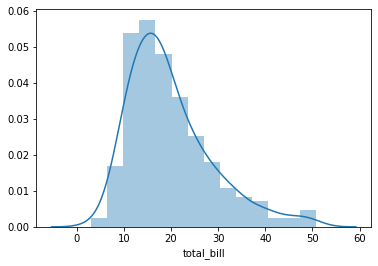

In [46]:
sns.distplot(series)

In [47]:
var = 'tip'
series = df[var]
type(series)

pandas.core.series.Series

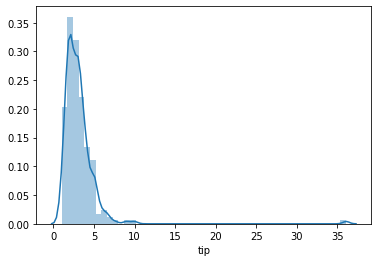

In [48]:
sns.distplot(series)

In [49]:
print("Mean: {}".format(series.mean()))
print("Stdev: {}".format(series.std()))
print("Min: {}".format(series.min()))
print("Max: {}".format(series.max()))
print("Median: {}".format(series.median()))
print("Mode: {}".format(series.mode()))
print("Skew: {}".format(series.skew()))
print("Kurtosis: {}".format(series.kurtosis()))

Mean: 3.1268163265306117
Stdev: 2.5265077601360084
Min: 1.0
Max: 36.1
Median: 2.88
Mode: 0    2.0
dtype: float64
Skew: 9.37845890718805
Kurtosis: 119.37402520899528


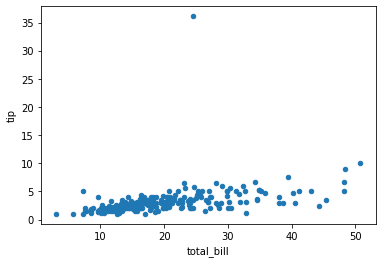

In [50]:
df.plot.scatter(x="total_bill", y="tip")

In [51]:
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.397805,0.597876
tip,0.397805,1.000000,0.347678
size,0.597876,0.347678,1.000000
